### Carregando a base dados com dígitos

In [5]:
# import dataset , classifers , and performace, metrics
from sklearn import datasets, svm, metrics 
import matplotlib.pyplot as plt


digits = datasets.load_digits()

- Describe and datasets 

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [10]:
# Visualizando as imagens dos dados 
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [13]:
# Visualizando a nossas classes 
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Visualizando imagens e classes 

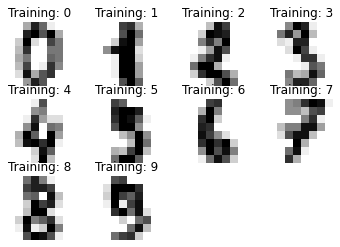

In [16]:
imagens_and_labels = list(zip(digits.images, digits.target_names))
for index, (image, label) in enumerate(imagens_and_labels[:10]):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Convertendo para o dataframe 

In [23]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [26]:
import pandas as pd 

In [28]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [30]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Divindo os dados de test e treinamento 

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train, y_test = train_test_split(dataset.drop('classe', axis=1),dataset['classe'],test_size=0.3)

## Verificando a forma dos dados

In [49]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [50]:
y_train.shape, y_test.shape 

((1257,), (540,))

### Aplicando o algoritimo KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

### Treinamento do algoritimo

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Predizendo novos pontos 

In [58]:
resultado = knn.predict(X_test)

In [60]:
resultado

array([2, 7, 5, 0, 5, 5, 9, 9, 4, 0, 5, 7, 4, 7, 4, 6, 2, 6, 7, 7, 3, 4,
       6, 0, 4, 2, 2, 5, 2, 3, 4, 9, 3, 9, 2, 9, 7, 8, 3, 0, 6, 3, 9, 6,
       1, 7, 7, 7, 7, 1, 0, 3, 3, 8, 0, 3, 4, 9, 9, 1, 3, 6, 3, 4, 2, 6,
       3, 8, 4, 4, 8, 0, 6, 0, 9, 7, 0, 3, 9, 5, 9, 3, 9, 0, 5, 2, 3, 9,
       0, 7, 2, 1, 4, 9, 8, 1, 6, 9, 5, 3, 7, 6, 2, 8, 4, 3, 6, 0, 2, 4,
       1, 3, 8, 8, 5, 2, 0, 4, 3, 9, 3, 2, 6, 9, 6, 1, 2, 6, 6, 9, 6, 2,
       3, 1, 8, 4, 1, 4, 9, 5, 2, 8, 0, 3, 6, 6, 8, 1, 3, 6, 1, 2, 6, 6,
       8, 4, 5, 5, 4, 7, 5, 0, 3, 3, 1, 2, 5, 8, 9, 0, 1, 7, 1, 5, 6, 5,
       0, 6, 7, 4, 6, 1, 9, 9, 9, 3, 8, 9, 9, 9, 7, 3, 0, 4, 0, 3, 8, 1,
       4, 2, 8, 3, 8, 7, 2, 9, 8, 0, 9, 7, 7, 6, 8, 0, 9, 1, 5, 9, 9, 6,
       7, 2, 3, 4, 7, 9, 9, 4, 0, 0, 6, 4, 3, 4, 9, 0, 0, 9, 6, 9, 2, 6,
       2, 2, 2, 7, 2, 7, 3, 2, 2, 1, 7, 6, 8, 7, 4, 1, 9, 0, 3, 6, 8, 2,
       2, 4, 8, 4, 7, 7, 5, 2, 8, 2, 5, 7, 3, 5, 4, 4, 2, 4, 4, 6, 7, 2,
       1, 8, 5, 3, 1, 8, 3, 0, 4, 3, 5, 5, 5, 0, 5,

## Tec de validação
-  metricas de classificação 

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        62
           3       0.98      0.98      0.98        63
           4       1.00      1.00      1.00        52
           5       1.00      0.98      0.99        48
           6       0.98      1.00      0.99        63
           7       0.98      1.00      0.99        45
           8       1.00      0.96      0.98        49
           9       1.00      1.00      1.00        62

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Métrica da confusão

In [66]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                
0        56   0   0   0   0   0   0   0   0   0   56
1         0  40   0   0   0   0   0   0   0   0   40
2         0   0  62   0   0   0   0   0   0   0   62
3         0   0   0  62   0   0   0   1   0   0   63
4         0   0   0   0  52   0   0   0   0   0   52
5         0   0   0   0   0  47   1   0   0   0   48
6         0   0   0   0   0   0  63   0   0   0   63
7         0   0   0   0   0   0   0  45   0   0   45
8         0   1   0   1   0   0   0   0  47   0   49
9         0   0   0   0   0   0   0   0   0  62   62
All      56  41  62  63  52  47  64  46  47  62  540


## Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])